In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
# We are gonna apply AR on a very simple data set having linear trends either upwards or downwards
df = pd.read_csv('uspopulation.csv',index_col='DATE',parse_dates=True)

In [4]:
df.index.freq='MS'

In [5]:
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
2011-06-01,311894
2011-07-01,312101
2011-08-01,312317
2011-09-01,312537


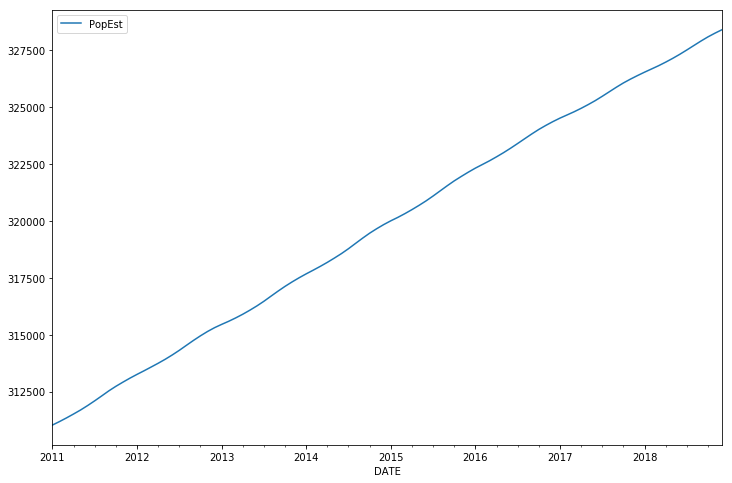

In [6]:
df.plot(figsize=(12,8)).autoscale(axis='x',tight=True)

# Lets split the data into traiing and test data set

In [7]:
len(df)

96

In [8]:
# lets put one year in our test data set
train = df.iloc[:84]
test = df.iloc[84:]


In [9]:
# Often when we are fitting with statsmodels, statsmodels needs to update something internally for future versions of scipy and numpy
#  So we may get some warning, which are not harmful

import warnings
warnings.filterwarnings('ignore')

# Fit an AR(1) model

In [10]:
model=AR(train['PopEst'])

In [11]:
# By the name we are showing that this is a fitted version of an order (1) AR model

# In the parameters showing in "fit" the most important one is "maxlag", which defines the order of AR we are going to use 

# There are different ways of solving these equations if we are dealing with higher order functions 
#   For Example ##   cmle - Conditional maximum likelihood using OLS
                ##   mle - Unconditional (exact) maximum likelihood.
    
# Solver to be used if method is 'mle'.  The default is 'lbfgs' (limited memory Broyden-Fletcher-Goldfarb-Shanno). 
#   Other choices are 'bfgs', 'newton' (Newton-Raphson), 'nm' (Nelder-Mead),'cg' - (conjugate gradient), 
#   'ncg' (non-conjugate gradient),and 'powell'.

AR1fit= model.fit(maxlag=1)

In [12]:
# Gives lag
AR1fit.k_ar

1

In [13]:
# This will give us the constants and coefficient variables 

AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [14]:
# This is the general format for obtaining predictions
start=len(train)

In [15]:
end=len(train)+len(test)-1

In [16]:
start

84

In [17]:
end

95

In [18]:
# In order to predict using a fitted AR model :

AR1fit.predict(start=start,end=end)

# The method call is predict for lots of stats models that we are gonna call in like ARIMA based models 
#  Previously we were using holt-winters method that was using forecast 

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [19]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [20]:
# Now lets compare our predictions with our test data set
predictions1 = AR1fit.predict(start=start,end=end)

In [21]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [22]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [23]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326560.4034, expected=326527
predicted=326742.7495, expected=326669
predicted=326925.0383, expected=326812
predicted=327107.2698, expected=326968
predicted=327289.4442, expected=327134
predicted=327471.5613, expected=327312
predicted=327653.6212, expected=327502
predicted=327835.6239, expected=327698
predicted=328017.5695, expected=327893
predicted=328199.4579, expected=328077
predicted=328381.2892, expected=328241
predicted=328563.0633, expected=328393


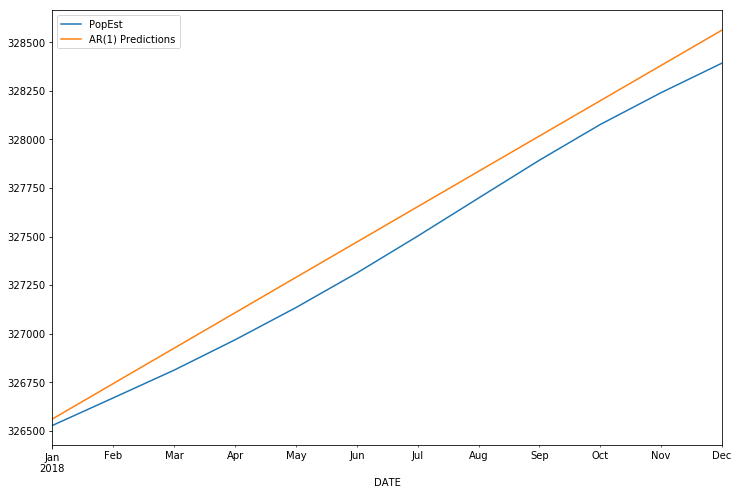

In [24]:
test.plot(figsize=(12,8), legend = True).autoscale(axis='x', tight=True)
predictions1.plot(legend=True).autoscale(axis='x', tight=True)

- We got good result with the fact that we are only considering one lag point in the past means we calculating based off only one month 

- Lets expand order

# Fit an AR(2) Model

In [25]:
AR2fit=model.fit(maxlag=2)

# This "model" object is already created above based off the training set by calling the AR method

In [26]:

AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [27]:
predictions2 = AR2fit.predict(start,end)

In [28]:
predictions2 = predictions2.rename('AR(2) Predictions')

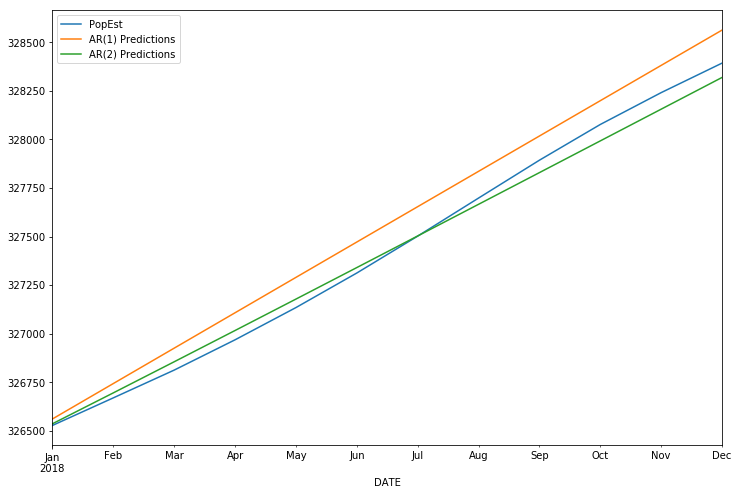

In [29]:
test.plot(figsize=(12,8), legend=True).autoscale(axis='x',tight=True)
predictions1.plot(legend=True).autoscale(axis='x',tight=True)
predictions2.plot(legend=True).autoscale(axis='x',tight=True)

- How do I figure out what is the best order value?
- We can actually let statsmodels choose p for us 

In [30]:
# We wont use lag(maxlag), because if we leave it to None, statsmodel is gonna take it upon itself to figure out the best level 

# But there is a ic parameter:
#       Criterion used for selecting the optimal lag length.
    # aic - Akaike Information Criterion
    # bic - Bayes Information Criterion
    # t-stat - Based on last lag
    # hqic - Hannan-Quinn Information Criterion
# we will use t-stat because later on I am gonna use RMSE or MSE(mean squared error ) to establise which one fits 
# We can experiment with this and speciafically depending upon what error metrics is most important to you

ARfit = model.fit(ic = 't-stat')

In [31]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [32]:
predictions8 = ARfit.predict(start,end)
predictions8 = predictions8.rename('AR(8) Predictions')


- All I have done so far is that I fitted the model without specifying the maxlag and statsmodels choose 8 lags should be the most aaccurate model, which is interesting because only 2 lags were performing good 

- So statsmodels decided that we should have 8 lags

- So lets evaluate this model

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
labels = ['AR1','AR2','AR12']

In [35]:
preds = [predictions1,predictions2,predictions8]

In [36]:
for i in range(3):
    # np.sqrt()
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was :{error}')
# So here we are comparing each of the prediction values  

AR1 MSE was :17449.714237833407
AR2 MSE was :2713.258683668394
AR12 MSE was :186.97263605698208


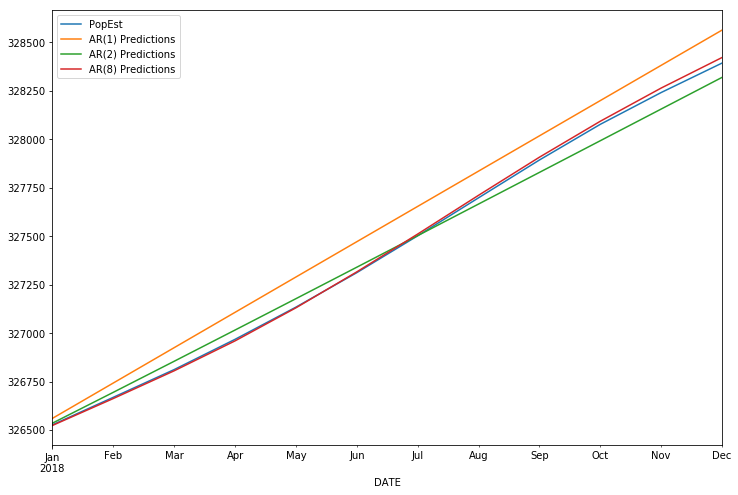

In [37]:
test.plot(figsize=(12,8), legend=True).autoscale(axis='x',tight=True)
predictions1.plot(legend=True).autoscale(axis='x',tight=True)
predictions2.plot(legend=True).autoscale(axis='x',tight=True)
predictions8.plot(legend=True).autoscale(axis='x',tight=True)

- So just by looking 8 months into the past you can accurately predict what the US population would be in the ninth month

- We were able to train this model to look back 8 months into the past and predict what the ninth month prediction will be 

# Lets forecast on future data 

- Lets try to predict the US population for 2020

- First step would be to retraining the model on the full data set 

In [38]:
model = AR(df['PopEst'])

ARfit = model.fit()

forcasted_values = ARfit.predict(start = len(df), end = len(df)+12).rename('Forecast')

# We forecasting for 12 months because we should only be forecasting for the number in test set

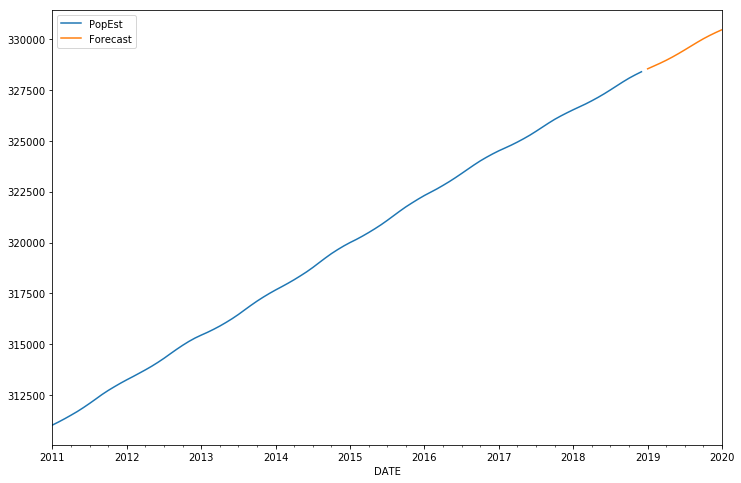

In [39]:
df['PopEst'].plot(figsize = (12,8), legend = True).autoscale(axis='x', tight=True)
forcasted_values.plot(legend=True).autoscale(axis='x', tight=True)